In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ID = test['Id']

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## ①まず目的変数である'SalePrice'について調べる

In [4]:
train['SalePrice'].describe().to_frame()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


### 相関係数の表を作成

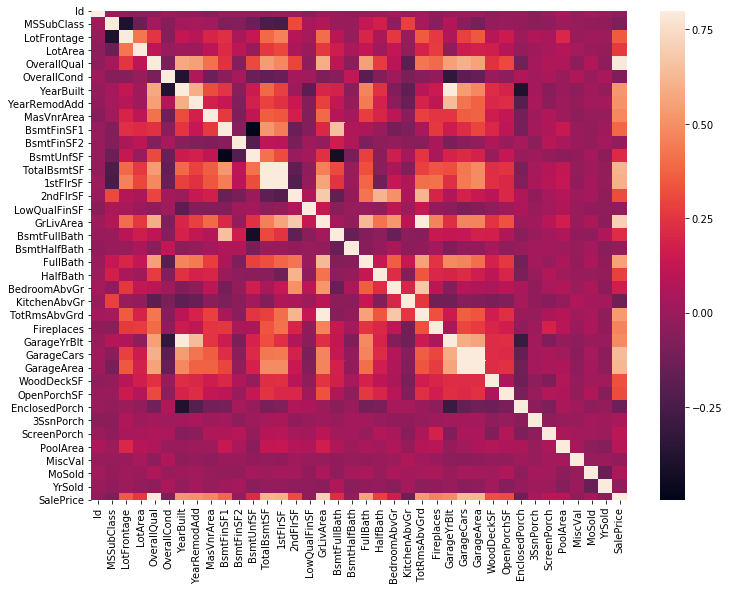

In [5]:
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8)

### 強い相関が見られる
- 1stFlrSFとTotalBsmtSF
- GarageAreaとGarageCars
- TotRmsAbvGrdとGrLivArea
- GarageYrBltとYearBuilt
- SalePriceとOverallQual

### SalePriceと相関が強い説明変数を調べる

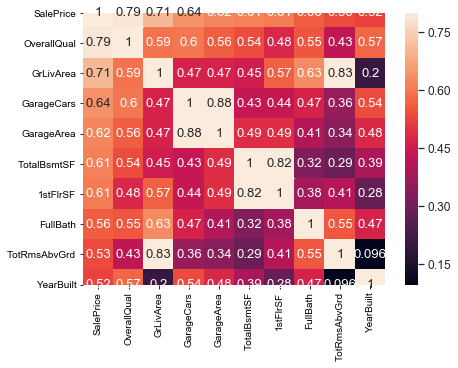

In [6]:
k = 10
cols = corrmat.nlargest(k, ['SalePrice']).index
Sale_corr = np.corrcoef(train[cols].values.T)
fig, ax = plt.subplots(figsize=(7,5))
sns.set(font_scale=1.1)
sns.heatmap(data=Sale_corr, vmax=0.8, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- GarageCarsとGarageAreaは非常に似たデータであることが分かるので、GarageAreaは不要
- 同様に1stFlrSFとTotRmsAbvGrdも不要

In [7]:
train.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'], axis=1, inplace=True)
test.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'], axis=1, inplace=True)

### SalePriceと相関が強い変数
- OverallQual
- GrLivArea
- GarageCars
- TotalBsmtSF
- FullBath
- YearBuilt

### SalePriceと相関が強い説明変数との関係を可視化してみる

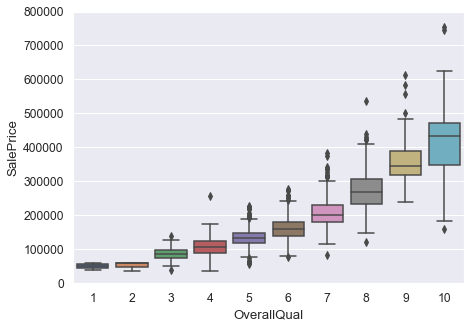

In [8]:
var = 'OverallQual'
fig, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


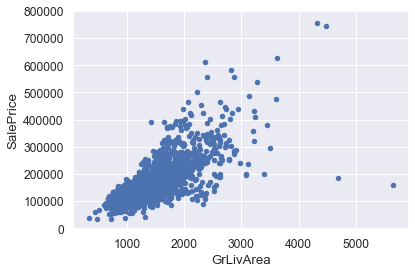

In [9]:
var = 'GrLivArea'
train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- 'GrLivArea'が4000を超えているにも関わらず、'SalePrice'が安い点が2つある。農業エリアと考えられるが外れ値とみなして問題ないだろう。

In [10]:
pd.set_option('display.max_columns', 100)

In [11]:
train.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,950,0,5642,2,0,2,1,3,1,Ex,Typ,3,Gd,Attchd,2008.0,Fin,2,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,1538,0,4676,1,0,3,1,3,1,Ex,Typ,1,Gd,BuiltIn,2007.0,Fin,3,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [12]:
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

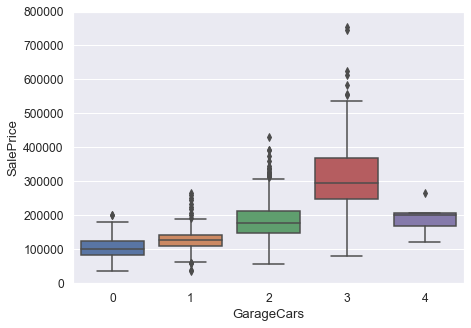

In [13]:
var = 'GarageCars'
fig,ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000);

- 4は母体数が少ないため、正確とは言えない

In [14]:
train.groupby('GarageCars')['Id'].count().to_frame()

,Id
GarageCars,
0,81
1,369
2,823
3,180
4,5


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


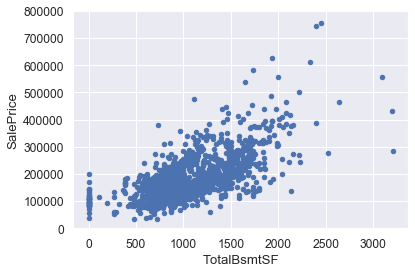

In [15]:
var = 'TotalBsmtSF'
train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- 線形の関係が見られる。
- TotalBsmtSfは0を多く含む。

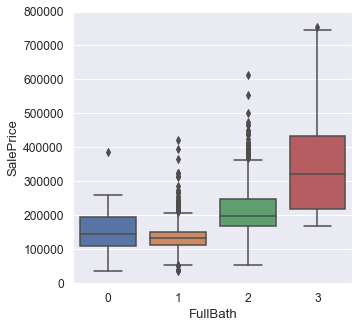

In [16]:
var = 'FullBath'
fig,ax = plt.subplots(figsize=(5,5))
fig = sns.boxplot(x=var, y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000);

- FullBathの個数が0,1個はほとんど変わらないが、2,3個では明らかにSalePriceが高くなっていることが分かる。

In [17]:
train.groupby('FullBath')['Id'].count().to_frame()

,Id
FullBath,
0,9
1,650
2,767
3,32


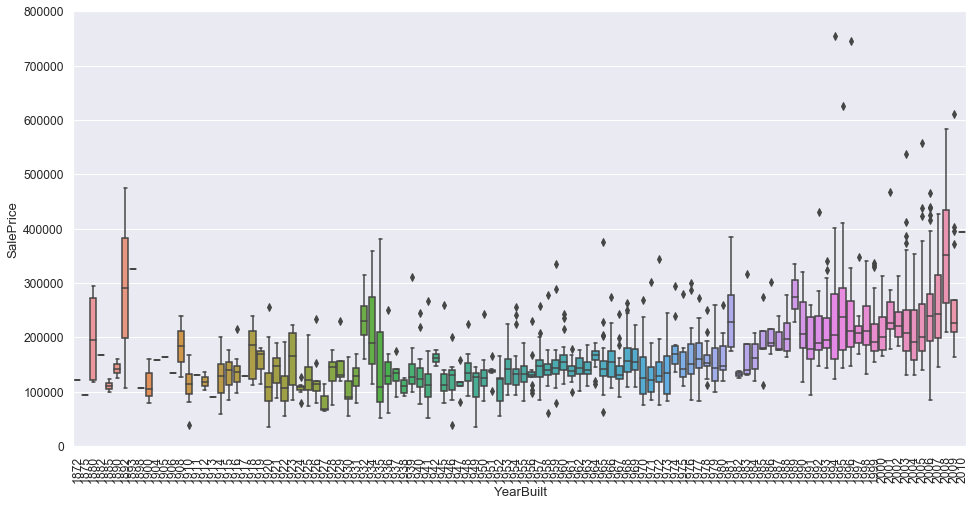

In [18]:
var = 'YearBuilt'
fig,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## 欠損値の確認と処理

In [19]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageCond,81,0.055556
GarageType,81,0.055556
GarageYrBlt,81,0.055556
GarageFinish,81,0.055556


- 'GarageX'という変数はすべて81個の欠損値を持ち、この81という数字は'GarageCars'が0台の時の数字と一致する。これらの変数の情報は'GarageCars'に含まれる(相関が強い)と考えられ、この'GarageX'という変数はすべて消していいだろう。
- 'BsmtX'という変数も、37個または38個の欠損値を持ち、この37という数字は'TotalBsmtSF'が0の時の数字と一致する。これらの変数の情報は'TotalBsmtSF'に含まれる(相関が強い)と考えられ、この'BsmtX'という変数もすべて消していいだろう。
- 'PoolQC', 'MiscFeature', 'Alley'は欠損値が非常に多く、データの傾向が正しく読み取れない。さらに’SalePrice’とは全然関係ないと考えられるので消して良いだろう。

In [20]:
train.groupby('GarageCars')['Id'].count().to_frame()

,Id
GarageCars,
0,81
1,369
2,823
3,180
4,5


In [21]:
train.groupby('TotalBsmtSF')['Id'].count().to_frame().head(5)

,Id
TotalBsmtSF,
0,37
105,1
190,1
264,3
270,1


### 不要と判断した列を全て消す

In [22]:
del_col1=['GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual',
          'BsmtFinType2','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1',
          'PoolQC', 'MiscFeature', 'Alley']
train.drop(del_col1, axis=1, inplace=True)
test.drop(del_col1, axis=1, inplace=True)

### 欠損値を含む列が19列あり、そのうち13列を削除した。
#### 以下では残り6列について調べていく。

#### ①'Fence'について調べる

In [23]:
train['SalePrice'].median()

163000.0

In [24]:
train.groupby('Fence')['SalePrice'].mean()

Fence
GdPrv    178927.457627
GdWo     140379.314815
MnPrv    148751.089172
MnWw     134286.363636
Name: SalePrice, dtype: float64

In [25]:
train.groupby('Fence')['SalePrice'].count()

Fence
GdPrv     59
GdWo      54
MnPrv    157
MnWw      11
Name: SalePrice, dtype: int64

In [26]:
train['Fence'] = train['Fence'].fillna('Nan')
test['Fence'] = test['Fence'].fillna('Nan')

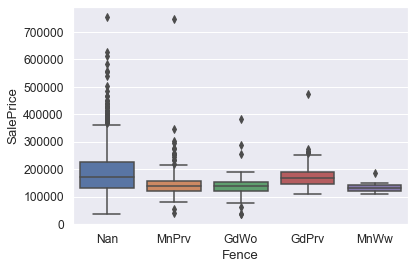

In [27]:
sns.boxplot(data=train, x='Fence', y='SalePrice')
plt.show()

- ’Gdprv’は他のカテゴリに比べて少しだけ’SalePrice’が高い。
- 'Nan'は'Fence'がないということを示す。

#### ②’FireplaceQu’について調べる

In [28]:
train['SalePrice'].mean()

180932.91906721535

In [29]:
train['SalePrice'].median()

163000.0

In [30]:
train.groupby('FireplaceQu')['SalePrice'].mean()

FireplaceQu
Ex    337712.500000
Fa    167298.484848
Gd    226637.005291
Po    129764.150000
TA    205723.488818
Name: SalePrice, dtype: float64

In [31]:
train.groupby('FireplaceQu')['SalePrice'].count()

FireplaceQu
Ex     24
Fa     33
Gd    378
Po     20
TA    313
Name: SalePrice, dtype: int64

In [32]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('Nan')

In [33]:
test['FireplaceQu'] = test['FireplaceQu'].fillna('Nan')

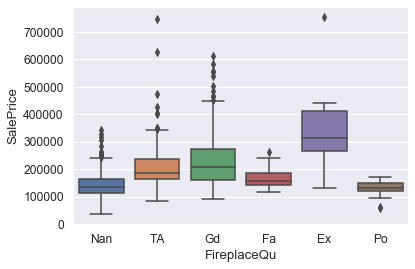

In [34]:
sns.boxplot(data=train, x='FireplaceQu', y='SalePrice')
plt.show()

- 'FireplaceQU'(暖炉の質)と'SalePrice'には関係があるといえる。
- 'Nan'を0, 'Po'を1, 'Fa'を2, 'TA'を3, 'Gd'を4, 'Ex'を5として置換する。(ダミー変数化を使うと相関が強くなる恐れがある)

In [35]:
train['FireplaceQu'] = train['FireplaceQu'].replace('Nan',0).replace('Po',1).replace('Fa',2).replace('TA',3).replace('Gd',4).replace('Ex',5)
test['FireplaceQu'] = test['FireplaceQu'].replace('Nan',0).replace('Po',1).replace('Fa',2).replace('TA',3).replace('Gd',4).replace('Ex',5)

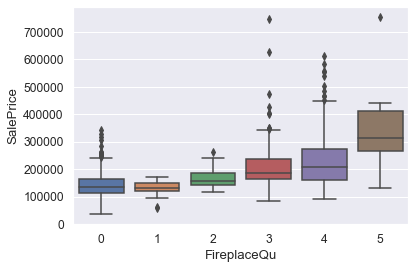

In [36]:
sns.boxplot(data=train, x='FireplaceQu', y='SalePrice')
plt.show()

#### ③LotFrontageについて調べる

In [37]:
pd.set_option('display.max_columns', 50)

In [38]:
train.groupby('LotFrontage')['SalePrice'].mean()

LotFrontage
21.0      94278.260870
24.0     145226.315789
30.0     160480.833333
32.0     186700.000000
33.0     113000.000000
             ...      
160.0    745000.000000
168.0    274725.000000
174.0    319000.000000
182.0    259000.000000
313.0    242000.000000
Name: SalePrice, Length: 110, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


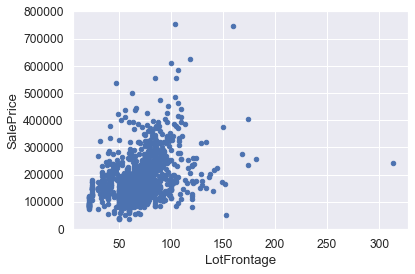

In [39]:
var = 'LotFrontage'
train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- 一点だけLotFrontageの値が大きい点が見られる。

In [40]:
print(max(train['LotFrontage']))

313.0


In [41]:
train[train['LotFrontage']==313]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,...,1,0,2,0,4,1,Gd,Typ,1,4,2,Y,0,0,0,0,0,0,Nan,0,11,2008,WD,Normal,242000


In [42]:
test.sort_values('LotFrontage', ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1139,2600,20,RL,200.0,43500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,...,2034,0.0,0.0,1,0,2,1,TA,Min1,0,0,4.0,N,483,266,0,0,0,561,GdPrv,0,6,2007,WD,Normal
804,2265,190,RL,195.0,41600,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,Norm,2fmCon,1Story,5,5,1969,1990,Gable,CompShg,HdBoard,HdBoard,None,...,1424,1.0,0.0,1,1,3,1,TA,Mod,0,0,3.0,N,144,0,0,0,0,0,Nan,0,11,2007,WD,Normal
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,...,1224,1.0,0.0,1,0,4,1,TA,Typ,1,3,2.0,Y,474,0,0,0,0,0,Nan,0,9,2006,WD,Abnorml
799,2260,20,RL,160.0,18160,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,6,1964,1964,Gable,CompShg,HdBoard,HdBoard,BrkCmn,...,1128,1.0,0.0,1,0,3,1,TA,Typ,1,3,2.0,P,0,108,246,0,0,0,MnPrv,0,3,2007,WD,Alloca
1053,2514,20,RL,155.0,20064,Pave,IR1,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,8,6,1976,1976,Shed,WdShngl,Wd Sdng,Wd Sdng,None,...,1743,2.0,0.0,0,1,0,1,Gd,Typ,2,2,2.0,Y,646,0,0,0,0,0,Nan,0,5,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2848,20,RL,NaN,11088,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,Stucco,Stucco,None,...,1358,1.0,0.0,1,1,1,1,Gd,Typ,1,3,2.0,Y,68,166,0,0,0,0,Nan,0,6,2006,WD,Normal
1390,2851,60,RL,NaN,21533,Pave,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Feedr,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,None,...,2049,0.0,0.0,2,1,4,1,Gd,Typ,1,3,2.0,Y,120,48,0,0,0,0,Nan,0,8,2006,WD,Normal
1440,2901,20,RL,NaN,50102,Pave,IR1,Low,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,6,5,1958,1958,Gable,Tar&Grv,Plywood,Plywood,None,...,1650,1.0,0.0,1,0,2,1,TA,Typ,2,4,2.0,Y,0,0,0,0,138,0,Nan,0,3,2006,WD,Alloca
1441,2902,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,...,1403,1.0,0.0,2,0,2,1,Gd,Typ,0,0,2.0,Y,0,173,0,0,0,0,Nan,0,10,2006,WD,Normal


- テストデータのLotFrontage列を降順にソートした

In [43]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

- 'Neighborhood'の種類ごとに’LotFrontage’の中央値で欠損値を補完した

#### ④MasVurArea（ベニヤ版の面積）について調べる

In [44]:
train.groupby('MasVnrArea')['SalePrice'].mean()

MasVnrArea
0.0       156557.946574
1.0       152250.000000
11.0      160200.000000
14.0      191000.000000
16.0      190233.571429
              ...      
1115.0    244000.000000
1129.0    176000.000000
1170.0    755000.000000
1378.0    625000.000000
1600.0    239000.000000
Name: SalePrice, Length: 325, dtype: float64

In [45]:
train.groupby('MasVnrArea')['SalePrice'].count()

MasVnrArea
0.0       861
1.0         2
11.0        1
14.0        1
16.0        7
         ... 
1115.0      1
1129.0      1
1170.0      1
1378.0      1
1600.0      1
Name: SalePrice, Length: 325, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


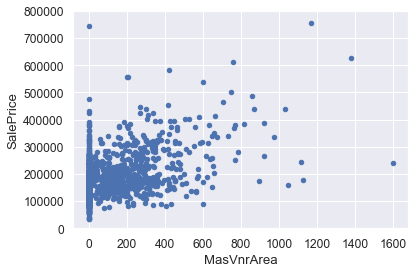

In [46]:
var = 'MasVnrArea'
train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [47]:
train['MasVnrArea'].describe()

count    1450.000000
mean      102.753793
std       179.442156
min         0.000000
25%         0.000000
50%         0.000000
75%       164.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

- 中央値が0なので、欠損値を0で補完する。

In [48]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [49]:
correlation_1 = np.corrcoef(train['MasVnrArea'], train['OverallQual'])
correlation_2 = np.corrcoef(train['MasVnrArea'], train['YearBuilt'])
print(correlation_1[0,1])
print(correlation_2[0,1])

0.3987845232522769
0.3087215642447482


- 既存の説明変数との相関係数はやや高いものの、このデータを消す根拠には至らないと判断した。

#### ⑤MasVnrType（ベニヤ板のタイプ）について調べる

In [50]:
train.groupby('MasVnrType')['SalePrice'].count()

MasVnrType
BrkCmn      15
BrkFace    445
None       864
Stone      126
Name: SalePrice, dtype: int64

- 最頻値が'None'なので、欠損値を'None'で補完する。

In [51]:
train['MasVnrType']=train['MasVnrType'].fillna('None')
test['MasVnrType']=test['MasVnrType'].fillna('None')

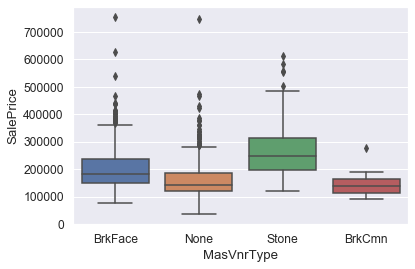

In [52]:
sns.boxplot(x='MasVnrType', y='SalePrice', data=train)
plt.show()

- None, BrkCmnはSalePriceがやや安く、Stoneは少し高いという傾向が見られる

#### ⑥Electricalについて調べる

In [53]:
train.groupby('Electrical')['SalePrice'].mean()

Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    186846.810060
Name: SalePrice, dtype: float64

In [54]:
train.groupby('Electrical')['SalePrice'].count()

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1332
Name: SalePrice, dtype: int64

#### Electrical列で欠損値を含む行を削除する

In [55]:
train.drop(train[train['Electrical'].isnull()].index, inplace=True)

#### 欠損値の総数を再び見てみる

In [56]:
train.isnull().sum().sort_values(ascending=False).to_frame()

,0
SalePrice,0
BsmtUnfSF,0
BsmtFinSF1,0
Foundation,0
ExterCond,0
...,...
2ndFlrSF,0
Electrical,0
CentralAir,0
HeatingQC,0


In [57]:
test.isnull().sum().sort_values(ascending=False).to_frame()

,0
MSZoning,4
BsmtHalfBath,2
BsmtFullBath,2
Functional,2
Utilities,2
...,...
Electrical,0
CentralAir,0
HeatingQC,0
Heating,0


In [58]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSZoning,4,0.002742
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Functional,2,0.001371
Utilities,2,0.001371
Exterior2nd,1,0.000685
KitchenQual,1,0.000685
GarageCars,1,0.000685
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685


In [59]:
train.groupby('MSZoning')['Id'].count()

MSZoning
C (all)      10
FV           65
RH           16
RL         1148
RM          218
Name: Id, dtype: int64

In [60]:
test['MSZoning'] = test['MSZoning'].fillna('RL')

- 一番多いRLで補完

In [61]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test[col] = test[col].fillna(0)

- 欠損値は地下がないと考えられ、0で補完する

In [62]:
train.groupby('Utilities')['Id'].count()

Utilities
AllPub    1456
NoSeWa       1
Name: Id, dtype: int64

- これは明らかに不要な説明変数と言える

In [63]:
train.drop(['Utilities'], axis=1, inplace=True)
test.drop(['Utilities'], axis=1, inplace=True)

In [64]:
train.groupby('Functional')['Id'].count()

Functional
Maj1      14
Maj2       5
Min1      31
Min2      34
Mod       15
Sev        1
Typ     1357
Name: Id, dtype: int64

In [65]:
test['Functional'] = test['Functional'].fillna('Typ')

- 一番多いTypで補完

In [66]:
train.groupby('KitchenQual')['Id'].count()

KitchenQual
Ex     98
Fa     39
Gd    585
TA    735
Name: Id, dtype: int64

In [67]:
test['KitchenQual'] = test['KitchenQual'].fillna('TA')

- 一番多いTAで補完

In [68]:
train.groupby('GarageCars')['Id'].count()

GarageCars
0     81
1    369
2    822
3    180
4      5
Name: Id, dtype: int64

In [69]:
test['GarageCars'] = test['GarageCars'].fillna(0)

- 欠損値は車庫がなかったと考えられるので0で補完

In [70]:
train.groupby('Exterior2nd')['Id'].count()

Exterior2nd
AsbShng     20
AsphShn      3
Brk Cmn      7
BrkFace     25
CBlock       1
CmentBd     59
HdBoard    207
ImStucc     10
MetalSd    214
Other        1
Plywood    142
Stone        5
Stucco      25
VinylSd    503
Wd Sdng    197
Wd Shng     38
Name: Id, dtype: int64

In [71]:
test['Exterior1st'] = test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

- 一番多いカテゴリで補完

In [72]:
train.groupby('SaleType')['Id'].count()

SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       120
Oth         3
WD       1266
Name: Id, dtype: int64

In [73]:
test['SaleType'] = test['SaleType'].fillna('WD')

- 一番多いWDで補完

In [74]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
SaleCondition,0,0.0
OverallQual,0,0.0
BsmtFinSF1,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
MasVnrArea,0,0.0
MasVnrType,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0


### ヒストグラムと正規確率プロットで正規性をみる

In [75]:
from scipy.stats import norm
from scipy import stats

#### SalePriceの正規性の確認

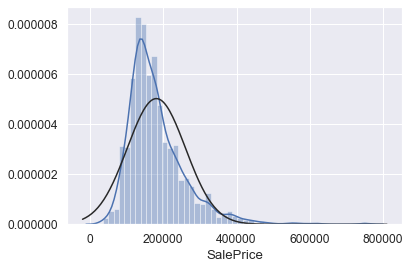

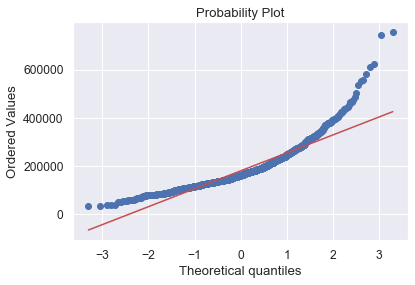

In [76]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

- 正規分布にあまり従っていない

#### 対数変換を用いて正規分布に近づける

In [77]:
train['SalePrice'] = np.log(train['SalePrice'])

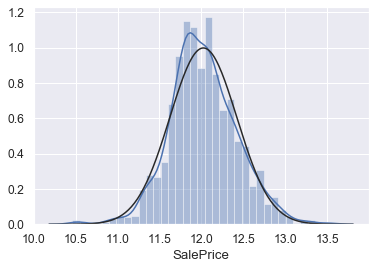

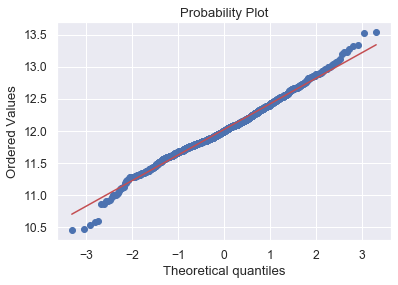

In [78]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

- 正規分布のグラフにかなり従うようになった

### ①訓練データとテストデータは連結させて、歪みの修正とダミー変数化を行う(Label Encoding使用)

In [79]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

In [80]:
y_train=pd.DataFrame(y_train)
y_train.columns = ['SalePrice']
y_train

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1452,12.072541
1453,12.254863
1454,12.493130
1455,11.864462


In [81]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

/Users/kobayashihiroki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [82]:
all_data

,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,...,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,854,0,3,1Fam,706.0,0.0,1.0,0.0,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,Nan,0,0,PConc,2,Typ,2.0,...,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,856.0,0,2003,2003,2008
1,0,0,3,1Fam,978.0,0.0,0.0,1.0,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,Nan,3,1,CBlock,2,Typ,2.0,...,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,1262.0,298,1976,1976,2007
2,866,0,3,1Fam,486.0,0.0,1.0,0.0,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,Nan,3,1,PConc,2,Typ,2.0,...,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,920.0,0,2001,2002,2008
3,756,0,3,1Fam,216.0,0.0,1.0,0.0,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,Nan,4,1,BrkTil,1,Typ,3.0,...,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,756.0,0,1915,1970,2006
4,1053,0,4,1Fam,655.0,0.0,1.0,0.0,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,Nan,3,1,PConc,2,Typ,3.0,...,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,546,0,3,Twnhs,0.0,0.0,0.0,0.0,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,Nan,0,0,CBlock,1,Typ,0.0,...,Reg,0,160,RM,0.0,None,0,6,MeadowV,0,7,4,Y,0,CompShg,Gable,Normal,WD,0,Pave,546.0,0,1970,1970,2006
2912,546,0,3,TwnhsE,252.0,0.0,0.0,0.0,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,Nan,0,0,CBlock,1,Typ,1.0,...,Reg,0,160,RM,0.0,None,0,4,MeadowV,24,5,4,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,546.0,0,1970,1970,2006
2913,0,0,4,1Fam,1224.0,0.0,1.0,0.0,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,Nan,3,1,CBlock,1,Typ,2.0,...,Reg,0,20,RL,0.0,None,0,9,Mitchel,0,7,5,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,1224.0,474,1960,1996,2006
2914,0,0,3,1Fam,337.0,0.0,0.0,1.0,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,MnPrv,0,0,PConc,1,Typ,0.0,...,Reg,0,85,RL,0.0,None,700,7,Mitchel,32,5,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,912.0,80,1992,1992,2006


#### 'MSSubClass(The building class)', 'OverallCond', 'YrSold', 'MoSoldを数値ではなくカテゴリ変数として扱う

In [83]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [84]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 
        'Functional', 'Fence', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 
        'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2916, 63)


In [85]:
from scipy.stats import skew

In [86]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
MiscVal,21.935910
PoolArea,17.685603
LotArea,13.107212
LowQualFinSF,12.082427
3SsnPorch,11.370087
LandSlope,4.972302
KitchenAbvGr,4.299698
BsmtFinSF2,4.143683
EnclosedPorch,4.001570
ScreenPorch,3.944305


In [87]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 45 skewed numerical features to Box Cox transform


In [88]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2916, 194)


In [89]:
train_1 = all_data[:ntrain]
test_1 = all_data[ntrain:]

In [90]:
train_1 = pd.concat([train_1, y_train], axis=1)
train_1

,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageCars,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LandSlope,...,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,11.686189,0.0,1.540963,11.170327,0.000000,0.730463,0.000000,7.483296,0.730463,0.000000,1.820334,1.194318,1.820334,0.000000,0.000000,1.194318,2.259674,1.194318,13.698888,0.730463,0.000000,0.730463,0.730463,1.194318,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12.247694
1,0.000000,0.0,1.540963,12.062832,0.000000,0.000000,0.730463,8.897844,0.730463,0.000000,1.820334,1.540963,1.820334,1.540963,0.730463,1.194318,2.259674,1.194318,12.792276,0.000000,0.000000,1.194318,0.730463,1.540963,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12.109011
2,11.724598,0.0,1.540963,10.200343,0.000000,0.730463,0.000000,9.917060,0.730463,0.000000,1.820334,1.194318,1.820334,1.540963,0.730463,1.194318,2.259674,1.194318,13.832085,0.730463,0.000000,1.540963,0.730463,1.194318,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12.317167
3,11.354094,0.0,1.540963,8.274266,0.000000,0.730463,0.000000,10.468500,0.730463,8.797736,1.820334,1.540963,1.820334,1.820334,0.730463,0.730463,2.259674,1.540963,13.711364,0.000000,1.194318,1.820334,0.730463,1.194318,0.0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11.849398
4,12.271365,0.0,1.820334,10.971129,0.000000,0.730463,0.000000,10.221051,0.730463,0.000000,1.820334,1.194318,1.820334,1.540963,0.730463,1.194318,2.259674,1.540963,14.480029,0.730463,0.000000,2.055642,0.730463,1.194318,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,11.124583,0.0,1.540963,0.000000,0.000000,0.000000,0.000000,11.990298,0.730463,0.000000,1.820334,1.540963,1.820334,1.540963,0.730463,1.194318,2.259674,1.194318,13.584606,0.730463,0.000000,13.213850,0.730463,1.540963,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12.072541
1453,0.000000,0.0,1.540963,11.473247,7.659675,0.730463,0.000000,10.692807,0.730463,0.000000,1.820334,1.540963,1.194318,1.540963,1.194318,1.194318,1.194318,1.194318,14.295205,0.000000,1.820334,13.215896,0.730463,1.540963,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12.254863
1454,12.528113,0.0,1.820334,8.823108,0.000000,0.000000,0.000000,11.759412,0.730463,0.000000,1.194318,0.000000,0.000000,1.820334,1.194318,1.194318,2.259674,0.730463,14.679454,0.000000,0.000000,13.217941,0.730463,1.194318,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12.493130
1455,0.000000,0.0,1.194318,5.321541,12.206046,0.730463,0.000000,0.000000,0.730463,6.881187,1.820334,1.540963,1.820334,0.000000,0.000000,0.730463,2.259674,0.730463,12.338074,0.000000,1.194318,13.219985,0.730463,1.194318,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,11.864462


In [91]:
train_1.to_csv('train_data.csv', index=False)
test_1.to_csv('test_data.csv', index=False)

### ②訓練データとテストデータは連結させて、歪みの修正とダミー変数化を行う(Label Encoding使用しない)

In [92]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

/Users/kobayashihiroki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [93]:
all_data

,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,...,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,854,0,3,1Fam,706.0,0.0,1.0,0.0,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,Nan,0,0,PConc,2,Typ,2.0,...,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,856.0,0,2003,2003,2008
1,0,0,3,1Fam,978.0,0.0,0.0,1.0,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,Nan,3,1,CBlock,2,Typ,2.0,...,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,1262.0,298,1976,1976,2007
2,866,0,3,1Fam,486.0,0.0,1.0,0.0,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,Nan,3,1,PConc,2,Typ,2.0,...,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,920.0,0,2001,2002,2008
3,756,0,3,1Fam,216.0,0.0,1.0,0.0,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,Nan,4,1,BrkTil,1,Typ,3.0,...,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,756.0,0,1915,1970,2006
4,1053,0,4,1Fam,655.0,0.0,1.0,0.0,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,Nan,3,1,PConc,2,Typ,3.0,...,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,546,0,3,Twnhs,0.0,0.0,0.0,0.0,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,Nan,0,0,CBlock,1,Typ,0.0,...,Reg,0,160,RM,0.0,None,0,6,MeadowV,0,7,4,Y,0,CompShg,Gable,Normal,WD,0,Pave,546.0,0,1970,1970,2006
2912,546,0,3,TwnhsE,252.0,0.0,0.0,0.0,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,Nan,0,0,CBlock,1,Typ,1.0,...,Reg,0,160,RM,0.0,None,0,4,MeadowV,24,5,4,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,546.0,0,1970,1970,2006
2913,0,0,4,1Fam,1224.0,0.0,1.0,0.0,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,Nan,3,1,CBlock,1,Typ,2.0,...,Reg,0,20,RL,0.0,None,0,9,Mitchel,0,7,5,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,1224.0,474,1960,1996,2006
2914,0,0,3,1Fam,337.0,0.0,0.0,1.0,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,MnPrv,0,0,PConc,1,Typ,0.0,...,Reg,0,85,RL,0.0,None,700,7,Mitchel,32,5,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,912.0,80,1992,1992,2006


In [94]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [95]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
MiscVal,21.935910
PoolArea,17.685603
LotArea,13.107212
LowQualFinSF,12.082427
3SsnPorch,11.370087
KitchenAbvGr,4.299698
BsmtFinSF2,4.143683
EnclosedPorch,4.001570
ScreenPorch,3.944305
BsmtHalfBath,3.929197


In [96]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 30 skewed numerical features to Box Cox transform


In [97]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2916, 265)


In [98]:
train_2 = all_data[:ntrain]
test_2 = all_data[ntrain:]

In [99]:
train_2 = pd.concat([train_2, y_train], axis=1)
train_2

,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,FireplaceQu,Fireplaces,FullBath,GarageCars,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,OverallQual,PoolArea,...,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
0,11.686189,0.0,1.540963,11.170327,0.000000,0.730463,0.000000,7.483296,0.000000,0.000000,0.000000,1.194318,1.194318,13.698888,0.730463,0.730463,0.730463,19.212182,5.831328,0.0,8.059126,0.000000,5.714669,2.440268,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,12.247694
1,0.000000,0.0,1.540963,12.062832,0.000000,0.000000,0.730463,8.897844,0.000000,1.540963,0.730463,1.194318,1.194318,12.792276,0.000000,1.194318,0.730463,19.712205,6.221214,0.0,0.000000,0.000000,0.000000,2.259674,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,12.109011
2,11.724598,0.0,1.540963,10.200343,0.000000,0.730463,0.000000,9.917060,0.000000,1.540963,0.730463,1.194318,1.194318,13.832085,0.730463,1.540963,0.730463,20.347241,5.914940,0.0,7.646538,0.000000,5.053371,2.440268,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,12.317167
3,11.354094,0.0,1.540963,8.274266,0.000000,0.730463,0.000000,10.468500,8.797736,1.820334,0.730463,0.730463,1.540963,13.711364,0.000000,1.820334,0.730463,19.691553,5.684507,0.0,0.000000,0.000000,4.745132,2.440268,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,11.849398
4,12.271365,0.0,1.820334,10.971129,0.000000,0.730463,0.000000,10.221051,0.000000,1.540963,0.730463,1.194318,1.540963,14.480029,0.730463,2.055642,0.730463,21.325160,6.314735,0.0,9.391827,0.000000,6.314735,2.602594,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,11.124583,0.0,1.540963,0.000000,0.000000,0.000000,0.000000,11.990298,0.000000,1.540963,0.730463,1.194318,1.194318,13.584606,0.730463,13.213850,0.730463,18.960528,5.744420,0.0,0.000000,0.000000,4.969939,2.259674,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,12.072541
1453,0.000000,0.0,1.540963,11.473247,7.659675,0.730463,0.000000,10.692807,0.000000,1.540963,1.194318,1.194318,1.194318,14.295205,0.000000,13.215896,0.730463,20.994868,6.337529,0.0,7.003881,0.000000,0.000000,2.259674,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,12.254863
1454,12.528113,0.0,1.820334,8.823108,0.000000,0.000000,0.000000,11.759412,0.000000,1.820334,1.194318,1.194318,0.730463,14.679454,0.000000,13.217941,0.730463,19.476345,5.859551,0.0,0.000000,14.892193,5.684507,2.440268,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,12.493130
1455,0.000000,0.0,1.194318,5.321541,12.206046,0.730463,0.000000,0.000000,6.881187,0.000000,0.000000,0.730463,0.730463,12.338074,0.000000,13.219985,0.730463,19.760176,5.914940,0.0,0.000000,0.000000,0.000000,2.055642,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,11.864462


In [100]:
train_2.to_csv('train_data_2.csv', index=False)
test_2.to_csv('test_data_2.csv', index=False)